<a href="https://colab.research.google.com/github/YagoOrnstein/TensorFlow-Training/blob/main/Convolutional_Neural_Networks_and_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Networks and Computer Vision with TensorFlow**

Architecture

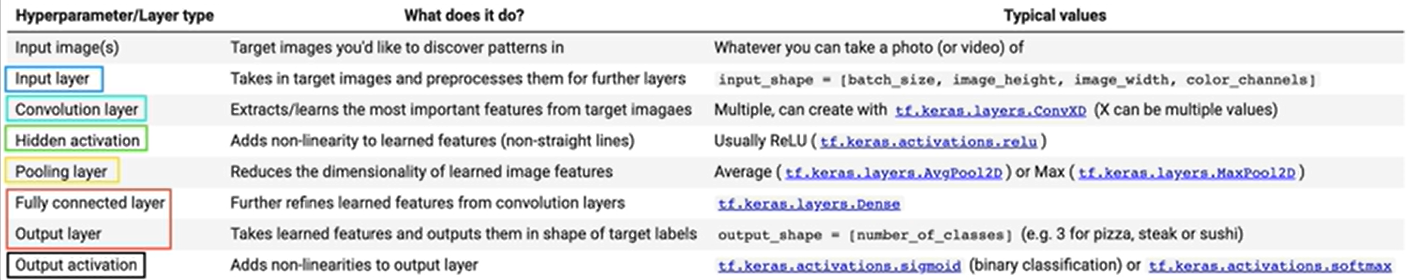

Get the data. This code going to download pizza_steak.zip for us

In [ ]:
# import zipfile

# # Path to the zip file in your local folder
# zip_file_path = r"C:\Users\yazo_\OneDrive\Masaüstü\Code\Google Colab\pizza_steak.zip"
# # !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the local zip file  zip_file_path
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()


## Inspect the dataset

A very crucial step at the beggining of the any machine learning project is becoming one with the data

And for a computer vision project this usually means visualizing many sample of your dataset

In [ ]:
import os

# Walt through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
num_steak_images_train = len(os.listdir("./pizza_steak/train/steak"))
num_steak_images_train

To visualize our images, first let's get the calss names programmatically.

In [ ]:
# Get the classname programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [ ]:
# View the image shape
img.shape # width, height, color channels

# Let's build a CNN neural nerwork model to find patterns in our images:

* Load our images
* Precprocess our images
* Build a CNN model
* Compile our CNN model
* Fit the CNN to our training data

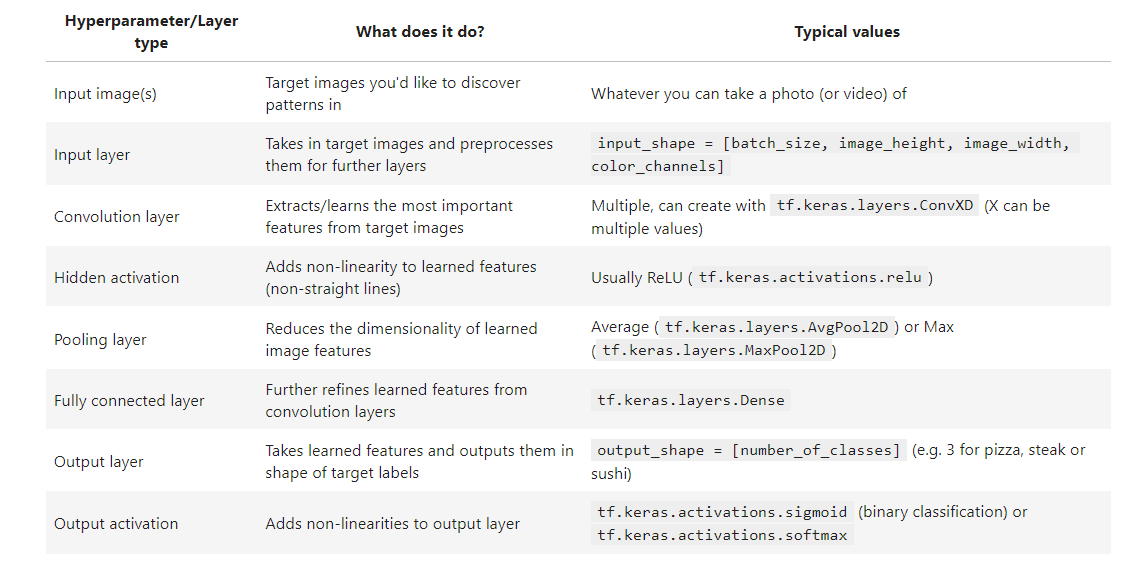

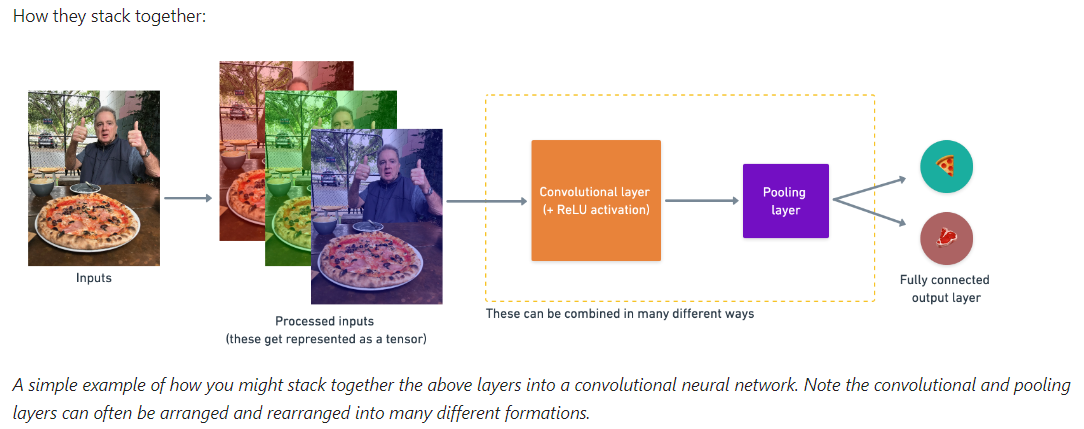

### ImageDataGenerator

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.



In [ ]:
# Get all the pixel values between 0 & 1 (normalize)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

**Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.**

In [ ]:
# Setup paths to our data directories
train_dir = r"C:\Users\yazo_\OneDrive\Masaüstü\Code\Google Colab\pizza_steak\train"
test_dir = r"C:\Users\yazo_\OneDrive\Masaüstü\Code\Google Colab\pizza_steak\test"

In [ ]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory =train_dir, # Target directory of images
                                               batch_size = 32, # Size of minbatches
                                               target_size = (224, 224), # Target size of images (heih,width)
                                               class_mode = "binary") # Type of data you're working with
valid_data = valid_datagen.flow_from_directory(directory =test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary")

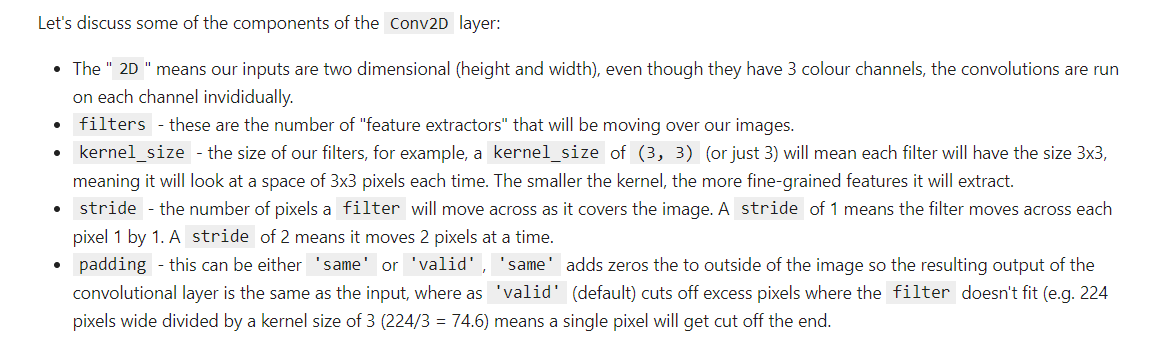

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Create a model
cnn_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         strides=1,
                         padding="valid",
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the CNN model
cnn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# Fit the CNN model
cnn_model.fit(train_data,
              epochs=5,
              validation_data = valid_data)

In [ ]:
# We are dividing it because we set the batch size to 32
print(len(train_data),"/ That's why len of train data is 47 /",1500/32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
tf.random.set_seed(42)

Trying non-cnn model on images

In [ ]:
non_cnn_model = Sequential([
    Flatten(input_shape=(224,224,3)),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(50, activation="relu"),
    Dense(20, activation="relu"),
    Dense(1, activation="sigmoid")
])

non_cnn_model.compile(loss=tf.keras.losses.binary_crossentropy,
                      optimizer=Adam(),
                      metrics=["accuracy"])

non_cnn_model.fit(train_data,epochs=5)

You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

In [ ]:
non_cnn_model.summary()

In [ ]:
cnn_model.summary()

As you can see in the summary they are nearly giving same percent of accuracy but total parameters value is incredibly more higher and because of it even running the code is more slower than CNN model

### Evaluating our model

In [ ]:
tf.random.set_seed(42)

new_model = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           padding="valid",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
    ])

new_model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

history_1 = new_model.fit(train_data,
                          epochs=10,
                          validation_data=valid_data)

In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot()

In [ ]:
def plot_curves(historys):
  df = pd.DataFrame(historys.history)
  plt.subplot(1,2,1)
  df["loss"].plot(figsize=(6,3), color="orange")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.subplot(1,2,2)
  df["val_loss"].plot(figsize=(6,3), color="red")
  plt.title("Validation Loss")
  plt.xlabel("Epochs")

  plt.figure()
  plt.subplot(1,2,1)
  df["accuracy"].plot(figsize=(6,3), color="blue")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.subplot(1,2,2)
  df["val_accuracy"].plot(figsize=(6,3), color="green")
  plt.title("Validation Accuracy")
  plt.xlabel("Epochs")

In [ ]:
plot_curves(history_1)

**When a validation loss start to increase it's likely means the model is overfitting. This means, it's learning the taining dataset too well and thus the model's abilitty to generalize to unseen data will be diminished.**

### Trying Gemini Model

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

model_gemini = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(128, activation='relu'),  # Hidden layer with 128 neurons
  Dense(1, activation='sigmoid')  # Output layer with 1 neurons (steak, pizza)
])

model_gemini.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

gemini_history = model_gemini.fit(train_data, epochs=10, validation_data=valid_data, callbacks=early_stopping)

In [ ]:
plot_curves(gemini_history)

In [ ]:
model_gemini.summary()

# Adjust the model

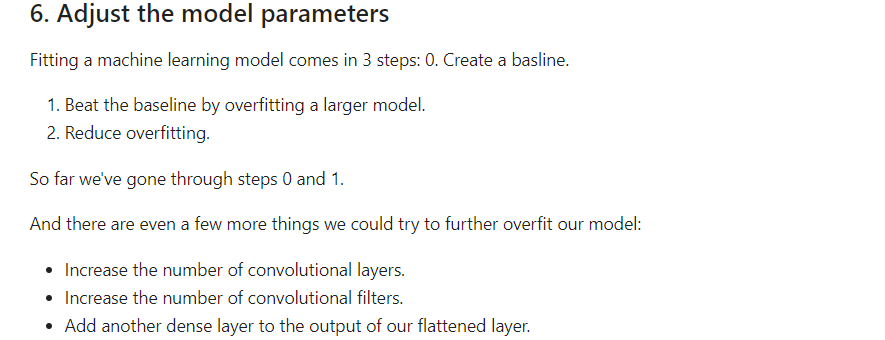

### Reduce the overfitting

In [ ]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
    ])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=10,
                        validation_data = valid_data)

Let's look at the graphs

In [ ]:
plot_curves(history_5)

In [ ]:
plt.figure(figsize=(5,4))
pd.DataFrame(history_1.history).plot()
plt.ylim(top=1,bottom=0)


plt.figure(figsize=(5,4))
pd.DataFrame(history_5.history).plot()
plt.ylim(top=1,bottom=0)

### Data Augmentation


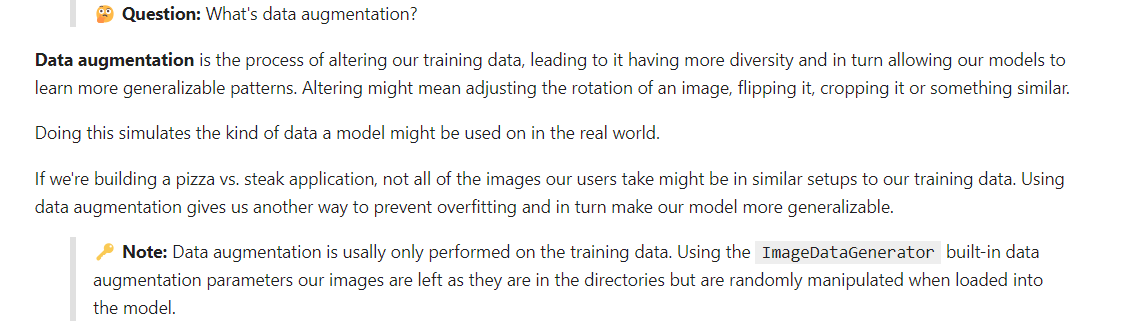

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             shear_range=0.2,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import augmented data
print("Augmented train data:")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=True)
print("Non-Augmented train data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  shuffle=True)


print("Non-Augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  shuffle=True)


In [ ]:
num_batches = len(train_data)
num_batches

In [ ]:
import random

batch_index = random.randint(0,47)

# You can adjust this index to get different batches
images, labels = train_data[batch_index]

# Retrieve a single batch of images and labels from the augmented data generator
augmented_images, augmented_labels = train_datagen_augmented[batch_index]


In [ ]:
random_number = random.randint(0,32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)


Let's use the augmented data on model

In [ ]:
tf.random.set_seed(42)

aug_model = Sequential([
    Conv2D(15,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(15,3,activation="relu"),
    MaxPool2D(),
    Conv2D(15,3,activation="relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1,activation="sigmoid")
])

aug_model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=Adam(),
                  metrics=["accuracy"])

aug_history = aug_model.fit(train_datagen_augmented,epochs=10,validation_data=test_data)

In [ ]:
plot_curves(aug_history)

### Improve Further

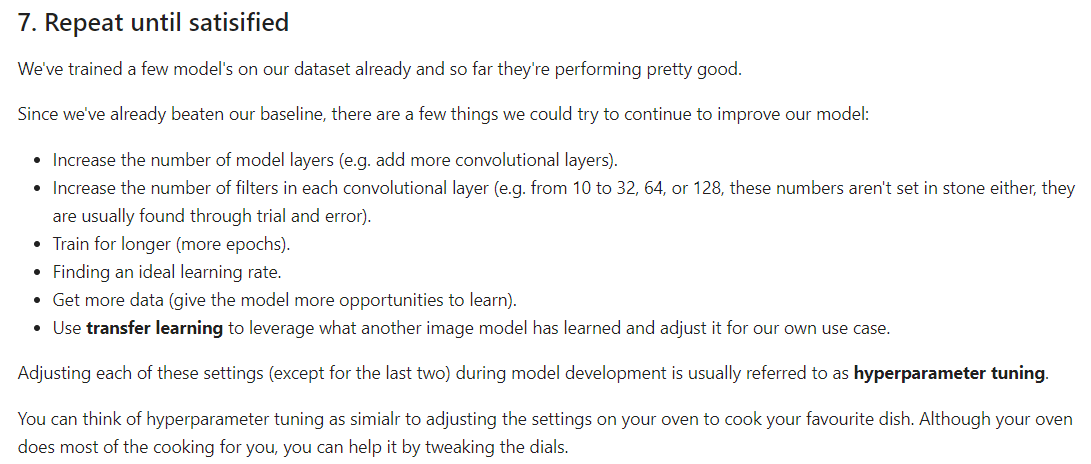

In [ ]:
import matplotlib.image as mpimg

steak = mpimg.imread(r"C:\Users\yazo_\OneDrive\Masaüstü\Code\03-steak.jpeg")

plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

In [ ]:
# Helper function to import an image and resize it
def resizer(image):
  re_img = tf.image.resize(image,[224,224])
  norm_re_img =  re_img/255.
  return norm_re_img

In [ ]:
reshaped_img = resizer(steak)
reshaped_img.shape

Let's try our previous model on a new image witch we upload ourself

In [ ]:
pred = aug_model.predict(tf.expand_dims(reshaped_img,axis=0))

In [ ]:
class_names

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filepath, class_name=class_names):
  """
  Imports and image located at filename, makes a prediction with model and plots
  the image with the predicted class as the title
  """
  item = mpimg.imread(filepath)
  item = resizer(item)
  predd = model.predict(tf.expand_dims(item,axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(item)
  plt.title((f"{pred_class}".capitalize()))
  plt.axis(False)

In [ ]:
pred_and_plot(aug_model,filepath=r"C:\Users\yazo_\OneDrive\Masaüstü\Code\03-steak.jpeg")

# Multi-class Classification

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk(r"C:\Users\yazo_\OneDrive\Masaüstü\Code\Datasets\10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
test_dir = r"C:\Users\yazo_\OneDrive\Masaüstü\Code\Datasets\10_food_classes_all_data\test"
train_dir = r"C:\Users\yazo_\OneDrive\Masaüstü\Code\Datasets\10_food_classes_all_data\train"

In [ ]:
# Let's get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(r"C:\Users\yazo_\OneDrive\Masaüstü\Code\Datasets\10_food_classes_all_data\test")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D, Activation

### Precprocess Data

In [ ]:
# Rescale first
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

### Create Model

In [ ]:
# Replicate same model in the website
tf.random.set_seed(42)

multiclass_model = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

multiclass_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                         optimizer=Adam(),
                         metrics=["accuracy"])

history_multicalss = multiclass_model.fit(train_data,
                                          epochs=5,
                                          validation_data=test_data)

In [ ]:
plot_curves(history_multicalss)

Validation loss is going up so that means overfitting

### Evaluate The Model

In [ ]:
# Let's augment training data first
train_datagen_aug_multi = ImageDataGenerator(rescale=1/255.,
                                             shear_range=0.2,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen_aug_multiclass = train_datagen_aug_multi.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="categorical",
                                                                      shuffle=True)

In [ ]:
# Then create new model and find the best learning rate
tf.random.set_seed(42)

evaluated_multiclass_model = tf.keras.models.clone_model(multiclass_model)

evaluated_multiclass_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                                   optimizer=Adam(),
                                   metrics=["accuracy"])

history_multicalss_evaluated = evaluated_multiclass_model.fit(train_datagen_aug_multiclass,
                                                              epochs=5,
                                                              validation_data=test_data)


In [ ]:
plot_curves(history_multicalss_evaluated)

With data augmantation we solved the problem of overfitting now. Other things we can do are:

* Augment the train data
* Find more data to train
* Adding Layers
* Transfer Learning

Right now It's a poor model low accuracy for validation but let's practice save

### Save the model

In [ ]:
import h5py
evaluated_multiclass_model.save("saved_multiclass_model_poor.h5")
